### Codio Activity 10.4: Hypothesis Testing for Stationarity


**Estimated Time: 45 Minutes**

**Total Points: 30**

This activity introduces an approach to run hypothesis tests on series to determine whether they are stationary or not.  The test is called the **Dicky Fuller Test**.  Similar to your earlier work with hypothesis tests, a null and alternative hypothesis are generated and a threshold determined.  Based on a $p$ value the hypothesis is either rejected or not rejected. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [95]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import warnings

warnings.filterwarnings("ignore")

### The Data

This example uses historical recruitment data from the year 1950 through 1987 and stock data from Google's Alphabet stock ticker.  For both series you will examine the results of the Dickey Fuller test for stationarity.  

In [96]:
recruitment = pd.read_csv(
    "data/recruitment.csv", index_col=0, infer_datetime_format=True
)

recruitment.index = pd.to_datetime(recruitment.index)

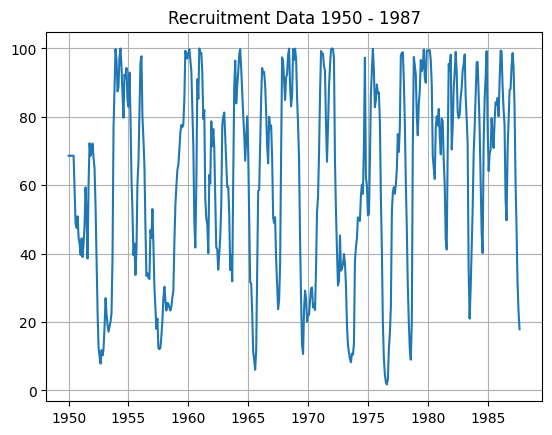

In [97]:
plt.plot(recruitment)
plt.title("Recruitment Data 1950 - 1987")
plt.grid()

[Back to top](#-Index)

### Problem 1

#### Using the `adfuller` object

**10 Points**

To test the series, the `adfuller` object tests the null hypothesis that the series **is not** stationary.  The results contain information including the test statistic and $p$-value. You can compare the test statistic to the significance values for alphas .01, .05, and .1.  Remember that if your test statistic is outside these significance levels you would reject the null hypothesis.  

Use the `results` object and the help from the `adfuller` documentation below to determine if the recruitment series is stationary.  Assign your response as a string to `ans1` below -- 'yes' or 'no'. 

In [112]:
results = adfuller(recruitment)

In [99]:
# results_store = adfuller(recruitment, store=True)
# resstore = results_store[-1]
# [resstore.H0, resstore.HA, resstore.icbest]
# dir(resstore)

In [100]:
def make_results_frame(adfuller_results, ci_pct: float = 5.0) -> pd.DataFrame:
    df = pd.DataFrame(
        [adfuller_results[0:4]],
        columns=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )

    for key in adfuller_results[4].keys():
        df[key] = adfuller_results[4][key]

    critical_values = np.array(list(adfuller_results[4].values()))
    df["Statistic < Critical Values"] = df["Test Statistic"] < np.min(critical_values)
    df["p-Value < Confidence Interval"] = df["p-value"] < ci_pct / 100.0

    df["Reject Null"] = (
        df["Statistic < Critical Values"].bool()
        and df["p-Value < Confidence Interval"].bool()
    )

    df["Is Stationary"] = df[
        "Reject Null"
    ].bool()  # Alternative: Stationarity exists in the series

    df["Accept Null"] = not df[
        "Reject Null"
    ].bool()  # Null hypothesis: Non Stationarity exists in the series

    df["Is Non-Stationary"] = not df["Is Stationary"].bool()

    return df


# make_results_frame(results)

In [113]:
results_keep = results  # because this variable overwritten below

In [114]:
### GRADED
display(make_results_frame(results_keep))
ans1 = "yes"

# Question: is it stationary?
# Answer: yes
# Yes, stationary. Because null *can* be rejected. Can be rejected because
# 1. adf is less than all critical values
# 2. p-value < 0.1 (reject null when p-value < a chosen confidence interval, here 10% = 0.1)
# If you can reject the null, you accept the alternative. The alternative is that:
# Stationarity exists in the series

# Answer Check
# print(ans1)# yes or no

,Test Statistic,p-value,#Lags Used,Number of Observations Used,1%,5%,10%,Statistic < Critical Values,p-Value < Confidence Interval,Reject Null,Is Stationary,Accept Null,Is Non-Stationary
0,-6.23997,4.723381e-08,12,440,-3.4453,-2.868131,-2.570281,True,True,True,True,False,False


In [103]:
# display(results[4])

[Back to top](#-Index)

### Problem 2

#### Tesla and Stationarity

**5 Points**

Now, your goal is to examine the stationarity of Tesla's stock data.  Below, the data is loaded as `tsla` and you are to examine the `Adj Close` feature to determine whether or not the series is stationary.  Assign your results as a string to `ans2` below -- `yes` or `no`.  

In [104]:
tsla = pd.read_csv("data/tsla.csv", index_col="Date")

In [105]:
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


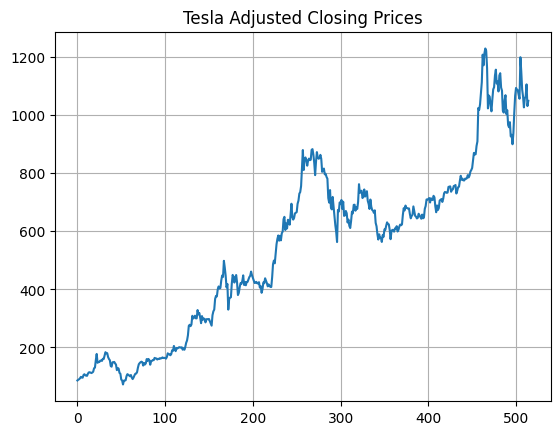

In [106]:
plt.plot(tsla["Adj Close"].values)
plt.title("Tesla Adjusted Closing Prices")
plt.grid()

In [107]:
results_tesla = adfuller(tsla["Adj Close"])
display(make_results_frame(results_tesla))

# Question: is it stationary?
# Answer: no
# No, not stationary, because *cannot* reject null hypothesis. Cannot reject, because
# 1. Test statistic > all critical values
# 2. And because p value = 0.82 > any confidence interval

### GRADED
ans2 = "no"

# Answer Check
print(ans2)  # yes or no

,Test Statistic,p-value,#Lags Used,Number of Observations Used,1%,5%,10%,Statistic < Critical Values,p-Value < Confidence Interval,Reject Null,Is Stationary,Accept Null,Is Non-Stationary
0,-0.775983,0.826075,0,514,-3.443136,-2.867179,-2.569774,False,False,False,False,True,True


no


[Back to top](#-Index)

### Problem 3

#### Examining the differenced data

**5 Points**

When the original series may not be stationary, we may be interested instead in the differenced data.  Below, create a series resulting from differencing the `Adj Close` feature and drop the missing values. Assign this differenced series as `adj_diff` and use the `adfuller` results to determine if the series is stationary.  Assign your response as a string to `ans3` below. 

,Test Statistic,p-value,#Lags Used,Number of Observations Used,1%,5%,10%,Statistic < Critical Values,p-Value < Confidence Interval,Reject Null,Is Stationary,Accept Null,Is Non-Stationary
0,-23.460407,0.0,0,513,-3.443162,-2.86719,-2.56978,True,True,True,True,False,False


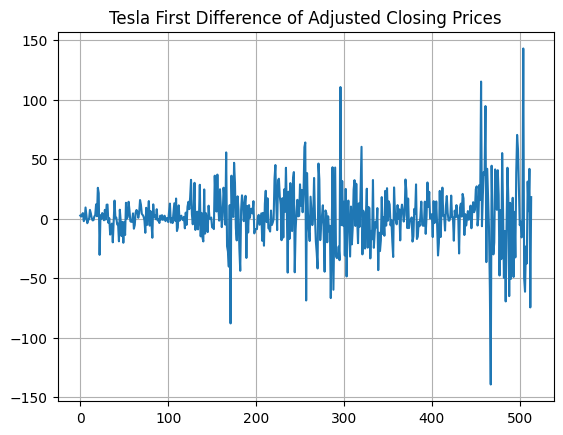

yes


In [108]:
### GRADED
adj_diff = tsla["Adj Close"].diff().dropna()
results_tesla_diff = adfuller(adj_diff)
display(make_results_frame(results_tesla_diff))

plt.plot(adj_diff.to_numpy())
plt.title("Tesla First Difference of Adjusted Closing Prices")
plt.grid()
plt.show()

# Question: is it stationary <-> can you reject null hypothesis?
# Answer: yes
# Can reject null hypothesis, because
# 1. Test < all critical values
# 2. p value = 0 < any confidence interval

ans3 = "yes"

# # Answer Check
# plt.plot(adj_diff.values)
# plt.title('Difference Tesla Closing Data')
# plt.grid();
# print(adj_diff.head())
print(ans3)  # yes or no

[Back to top](#-Index)

### Problem 4

#### Stationarity of residuals in a decomposition model

**10 Points**

Below, use the recruitment data to build a decomposition model using `STL` with all arguments default.  Fit the estimator as `results` and extract the residuals as `resids`.  Pass these residuals to the `adfuller` object and decide whether or not the residuals are stationary at the 0.05 level.  Assign your answer as a string to `ans4` below.

,Test Statistic,p-value,#Lags Used,Number of Observations Used,1%,5%,10%,Statistic < Critical Values,p-Value < Confidence Interval,Reject Null,Is Stationary,Accept Null,Is Non-Stationary
0,-9.456868,4.460828e-16,14,438,-3.445368,-2.868161,-2.570297,True,True,True,True,False,False


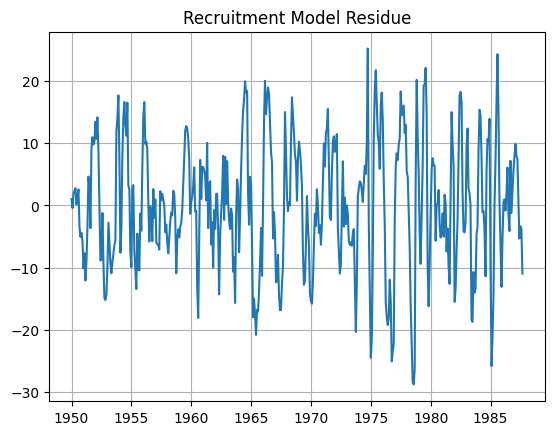

'yes'

In [109]:
### GRADED
stl = STL(recruitment)
results = stl.fit()
resids = results.resid
recruitment_adfuller = adfuller(resids)
display(make_results_frame(recruitment_adfuller, ci_pct=5.0))

# 'yes' if adfuller(results_.resid)[1] < 0.05 else 'no'

plt.plot(resids)
plt.title("Recruitment Model Residue")
plt.grid()
plt.show()

ans4 = "yes"

# # Answer Check
ans4

Using the **Dickey Fuller** test is important as some of our models will expect stationary data.  This test gives a basic tool for determining whether a series is stationary outside of the general eye test.  You should understand that an increasing or decreasing series is not going to be stationary.  